# IRIS - Pflanzenbestimmung

## Überprüfung der Informationen über den Datensatz

### Daten aus dem angegebenen Datensatz laden:

In [35]:
import pandas as pd

def get_data():
    return pd.read_csv("iris.data_subset_2.csv")

### Statistiken über den angegebenen Datensatz:

In [36]:
data = get_data()
print(data.describe(percentiles=[.1, .2, .3, .4, .5, .6 , .7, .8, .9]))

       sepal-length  sepal-width  petal-length  petal-width
count    120.000000   120.000000    120.000000   120.000000
mean       5.842500     3.053333      3.749167     1.186667
std        0.844026     0.426227      1.773237     0.762232
min        4.300000     2.000000      1.100000     0.100000
10%        4.800000     2.500000      1.400000     0.200000
20%        5.000000     2.700000      1.500000     0.200000
30%        5.200000     2.800000      1.600000     0.400000
40%        5.500000     3.000000      3.900000     1.200000
50%        5.800000     3.000000      4.350000     1.300000
60%        6.100000     3.100000      4.640000     1.500000
70%        6.300000     3.200000      5.000000     1.730000
80%        6.600000     3.400000      5.400000     1.900000
90%        6.900000     3.600000      5.800000     2.110000
max        7.900000     4.400000      6.700000     2.500000


### Überprüfung der 35. und 38. Stichprobe des Datensatzes:

In [37]:
print("The 35th sample is: (%.1f, %.1f, %.1f, %.1f, %s)" % (data.iloc[34][0], data.iloc[34][1], data.iloc[34][2], data.iloc[34][3], data.iloc[34][4]))
print("The 38th sample is: (%.1f, %.1f, %.1f, %.1f, %s)" % (data.iloc[37][0], data.iloc[37][1], data.iloc[37][2], data.iloc[37][3], data.iloc[37][4]))

The 35th sample is: (5.1, 3.8, 1.9, 0.4, Iris-setosa)
The 38th sample is: (4.6, 3.2, 1.4, 0.2, Iris-setosa)


### Anzahl von Instanzen (insgesamt und pro Klasse):

In [38]:
print("Anzahl von Instanzen ist:", data.index.stop)
print("Mit 40 in jeder der drei Klassen (33% der Klassenverteilung) \n")
print(data.groupby("class").size(), "\n")
print("Fehlende Attributwerte:", data.isnull().sum().sum())

Anzahl von Instanzen ist: 120
Mit 40 in jeder der drei Klassen (33% der Klassenverteilung) 

class
Iris-setosa        40
Iris-versicolor    40
Iris-virginica     40
dtype: int64 

Fehlende Attributwerte: 0


### Die Korrelationsmatrix für Kelchblätter und Blütenblätter:

In [39]:
print("Die Korrelationsmatrix für Kelchblätter und Blütenblätter:")
print(data.corr(numeric_only = True))

Die Korrelationsmatrix für Kelchblätter und Blütenblätter:
              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.075497      0.871629     0.826669
sepal-width      -0.075497     1.000000     -0.398872    -0.336893
petal-length      0.871629    -0.398872      1.000000     0.965097
petal-width       0.826669    -0.336893      0.965097     1.000000


## Training des Modells

### Es wurde ein Support Vector Classifier (SVC) mit Polynomial Kernel genommen. SVC mit Linear Kernel führt zu einer Genauigkeit von 100%.

### Da der Datensatz klein ist, wurde beschlossen, ein Verhältnis von 60/40 für die Trainingsdaten und die Testdaten zu verwenden.

### Hierzu wird eine Confusion Matrix und Classification Report bzgl. der drei Iris-Klassen ausgegeben, sowie die Genauigkeit des Classifiers.

In [40]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

classifier = SVC(kernel = "poly", probability = True)

trained_data = data.drop("class", axis = 1)
trained_labels = data["class"]

training_data, test_data, training_labels, test_labels = train_test_split(trained_data, trained_labels, test_size = 0.4)

training_data = np.array(training_data)
test_data = np.array(test_data)

classifier.fit(training_data, training_labels)

predicted_data = classifier.predict(test_data)
accuracy = classifier.score(test_data, test_labels)

print("Confusion Matrix bzgl. der drei Iris-Klassen:")
print(confusion_matrix(test_labels, predicted_data), "\n")

print("Classification Report bzgl. der drei Iris-Klassen:")
print(classification_report(test_labels, predicted_data))

print("Genauigkeit:", accuracy)

Confusion Matrix bzgl. der drei Iris-Klassen:
[[16  0  0]
 [ 0 13  1]
 [ 0  2 16]] 

Classification Report bzgl. der drei Iris-Klassen:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.94      0.89      0.91        18

       accuracy                           0.94        48
      macro avg       0.94      0.94      0.94        48
   weighted avg       0.94      0.94      0.94        48

Genauigkeit: 0.9375


## Dempster Shafer (Evidenztheorie)

### Durch Akkumulation zweier Basismaße entsteht bei Anwendung von Dempsters-Shafer Regel ein neues Basismaß.

In [41]:
def dempster_shafer_rule(m1, m2):
    # extract the frame of discernment      
     sets = set(m1.keys()).union(set(m2.keys()))
     result = dict.fromkeys(sets,0)
     # Combination process
     for i in m1.keys():
         for j in m2.keys():
             if set(str(i)).intersection(set(str(j))) == set(str(i)):
                 result[i] += m1[i] * m2[j]
             elif set(str(i)).intersection(set(str(j))) == set(str(j)):
                 result[j] += m1[i] * m2[j]
                 
    # normalize the results
     f = sum(list(result.values()))
     for i in result.keys():
         result[i] /= f
     return result

### Gibt einen Iterator über die Potenzmenge von 'set' zurück. Alle zurückgegebenen Teilmengen sind vom Typ 'frozenset'.

In [42]:
from itertools import chain, combinations
def powerset(iterable):
    return map(frozenset, chain.from_iterable(combinations(iterable, r) for r in range(len(iterable) + 1)))

### Zeichnungen der Graphen, die dem Erscheinungsbild der drei Klassen bei bestimmten Eigenschaften entsprechen.

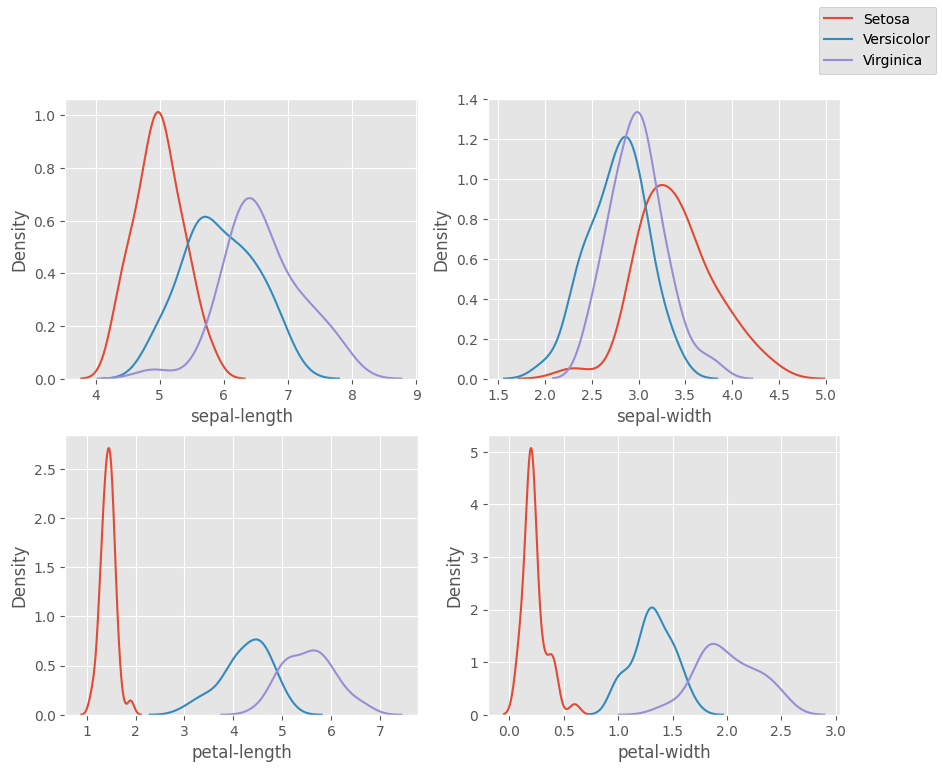

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
matplotlib.use('Agg')
matplotlib.style.use('ggplot')
%matplotlib inline

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    f, axes = plt.subplots(2, 2, figsize = (10, 8), sharex = False)
    for fd, ax in [('sepal-length', axes[0, 0]), ('sepal-width', axes[0, 1]), ('petal-length', axes[1, 0]), ('petal-width', axes[1, 1])]:
        for iris_class in data["class"].unique():
            sns.distplot(data[data["class"] == iris_class][fd], ax = ax, hist = False, label = iris_class, axlabel = fd)
            f.legend(labels=["Setosa","Versicolor", "Virginica"])

### Gruppierung von Annahmen basierend auf einem Wertebereich eines Attributes und einem bestimmten Eingabewert.

In [44]:
def get_hypothesis_with_range(class_range, att_name, att_value):
    hset = set()
    for iris_class in data["class"].unique():
        if (class_range[iris_class][att_name][0] <= att_value and att_value < class_range[iris_class][att_name][1]):
            hset.add(iris_class)
    return frozenset(hset)

### Die Evidenz mit einer einzigen Klasse x und das Unwissen m(Ω) werden so festgelegt: m(class x) = 0.88, m(Ω) = 0.12.

### Für Datenelemente, die zwei möglichen Klassen x und y zugeordnet sind: m(class x U class y) = 0.88, m(Ω) = 0.12.

### Für Datenelemente, die als möglicherweise zu allen drei Klassen gehören können: m(Ω) = 1

In [45]:
def get_hypothesis_probabilities(probabilities, hypothesis, singletons, omega):
    if hypothesis in singletons:
        probabilities[hypothesis] += 0.88
        probabilities[omega] += 0.12
    elif hypothesis == omega:
        probabilities[omega] += 1.0
    else:
        probabilities[hypothesis] += 0.88
        probabilities[omega] += 0.12

### Ermittlung des Wertebereichs pro Attribut in jeder Klasse.

In [46]:
class_range = {}
attributes = ["sepal-length", "sepal-width", "petal-length", "petal-width"]

for iris_class in data["class"].unique():
    attribute_range = {}
    for att in attributes:
        attribute_range[att] = (min(data[data["class"] == iris_class][att]), max(data[data["class"] == iris_class][att]))
    class_range[iris_class] = attribute_range

### Die resultierende Basismaße wird gerechnet mithilfe der oben definierte Funktion 'dempster_shafer_rule(m1, m2)'.

In [47]:
from math import fsum
import functools

def get_final_basismaße(singletons, omega, input_data):
    basismaße = {}
    for att in attributes:
        probabilities = dict.fromkeys(powerset(data["class"].unique()), 0)
        for index, row in input_data.iterrows():
            hypothesis = get_hypothesis_with_range(class_range, att, row[att])
            get_hypothesis_probabilities(probabilities, hypothesis, singletons, omega)

        if frozenset() in probabilities:
            del probabilities[frozenset()]

        basismaße_sum = fsum(probabilities.values())

        # normalise in case the sum is > 1
        if basismaße_sum != 1.0:
            for (h, v) in probabilities.items():
                probabilities[h] = v / basismaße_sum
            
        basismaße[att] = probabilities

    # which is doing - ms['SepalLength'] & ms['SepalWidth'] & ms['PetalLength'] & ms['PetalWidth']
    combined_basismaße = functools.reduce(lambda a, b: dempster_shafer_rule(a, b), basismaße.values())
    print("Die resultierende Basismaße ist: \n", combined_basismaße)
    return combined_basismaße

### Hier müssen die Eingabe der Information zu Kelchblatt und Blütenblatt (in cm) festgelegt werden.

In [48]:
probabilities = dict.fromkeys(powerset(data["class"].unique()), 0)
singletons = {p for p in probabilities}
omega = frozenset(data["class"].unique())

sepal_length = 6.7
sepal_width = 3.3
petal_length = 5.7
petal_width = 2.1

# Creating the data from the input values
input_data = pd.DataFrame(
    [[sepal_length, sepal_width, petal_length, petal_width]],
    columns=["sepal-length", "sepal-width", "petal-length", "petal-width"])

combined_basismaße = get_final_basismaße(singletons, omega, input_data)

Die resultierende Basismaße ist: 
 {frozenset({'Iris-setosa'}): 0.0, frozenset({'Iris-virginica'}): 0.9856, frozenset({'Iris-versicolor'}): 0.0, frozenset({'Iris-setosa', 'Iris-virginica'}): 0.0, frozenset({'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'}): 0.001728, frozenset({'Iris-virginica', 'Iris-versicolor'}): 0.012672, frozenset({'Iris-setosa', 'Iris-versicolor'}): 0.0}


### Belief, dass eine Iris-Klasse ausgegeben wird.

In [49]:
def bel(combined_basismaße, hypothesis):
    get_final_basismaße
    # The belief of 'hypothesis' is returned
    hypothesis = frozenset(hypothesis)
    if not hypothesis:
        return 0.0
    else:
        return fsum([v for (h, v) in combined_basismaße.items() if h and hypothesis.issuperset(h)])
            
bel_setosa = bel(combined_basismaße, frozenset({'Iris-setosa'}))
bel_versicolor = bel(combined_basismaße, frozenset({'Iris-versicolor'}))
bel_virginica = bel(combined_basismaße, frozenset({'Iris-virginica'}))

print("Belief, dass Iris-setosa das Ergebniss ist:", bel_setosa)
print("Belief, dass Iris-versicolor das Ergebniss ist:", bel_versicolor)
print("Belief, dass Iris-virginica das Ergebniss ist:", bel_virginica)

Belief, dass Iris-setosa das Ergebniss ist: 0.0
Belief, dass Iris-versicolor das Ergebniss ist: 0.0
Belief, dass Iris-virginica das Ergebniss ist: 0.9856


### Plausibilität, dass eine Iris-Klasse ausgegeben wird.

In [50]:
def pl(combined_basismaße, hypothesis):
    # The plausibility of 'hypothesis' is returned.
    hypothesis = frozenset(hypothesis)
    if not hypothesis:
        return 0.0
    else:
        return fsum([v for (h, v) in combined_basismaße.items() if hypothesis & h])
        
pl_setosa = pl(combined_basismaße, frozenset({'Iris-setosa'}))
pl_versicolor = pl(combined_basismaße, frozenset({'Iris-versicolor'}))
pl_virginica = pl(combined_basismaße, frozenset({'Iris-virginica'}))

print("Plausibilität, dass Iris-setosa das Ergebniss ist:", pl_setosa)
print("Plausibilität, dass Iris-versicolor das Ergebniss ist:", pl_versicolor)
print("Plausibilität, dass Iris-virginica das Ergebniss ist:", pl_virginica)

Plausibilität, dass Iris-setosa das Ergebniss ist: 0.001728
Plausibilität, dass Iris-versicolor das Ergebniss ist: 0.0144
Plausibilität, dass Iris-virginica das Ergebniss ist: 1.0


### Hier werden die vorhergesagte Iris mittgeteilt durch die Evidenztheorie sowie durch die trainierte SVC-Classifier.

In [51]:
def predict(data, combined_basismaße):
    best_value = 0.0
    best_class = frozenset({})
    for iris_class in combined_basismaße:
        if (combined_basismaße[iris_class] > best_value):
            best_value = combined_basismaße[iris_class]
            best_class = iris_class
    return (best_class, best_value)

(best_class, best_value) = predict(input_data, combined_basismaße)

print("Die vorhergesagte Iris durch Evidenztheorie hat den Typ:", list(best_class)[0])

predicted_iris = classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])
print("Die vorhergesagte Iris durch trainierte SVC-Classifier hat den Typ:", predicted_iris[0])

Die vorhergesagte Iris durch Evidenztheorie hat den Typ: Iris-virginica
Die vorhergesagte Iris durch trainierte SVC-Classifier hat den Typ: Iris-virginica
